In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

## loading the dataset

In [2]:
dataset=MNIST(root='dataset/',download=True)

## loading the test dataset from the downloaded data

In [3]:
test_dataset=MNIST(root='dataset/',train=False)

In [4]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: dataset/
    Split: Test

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x133CCC1FC88>, 5)

## viewing the image

In [6]:
import matplotlib.pyplot as plt

In [7]:
img,label=dataset[10]

3


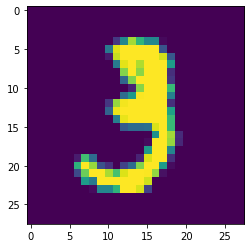

In [8]:
plt.imshow(img)
print(label)

## converting images to tensors

In [9]:
import torchvision.transforms as transform

In [10]:
ds=MNIST(root='dataset/',train=True,transform=transform.ToTensor())

In [11]:
img,label=ds[0]

In [12]:
print(img.shape)
print(label)

torch.Size([1, 28, 28])
5


In [13]:
y=img[0,10:15,10:15]
# y=torch.rand(1280,1280)

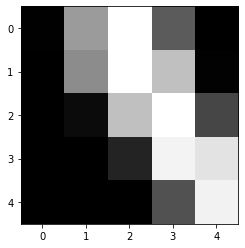

In [14]:
plt.imshow(y,cmap='gray')

## Understanding How to Split Training and Validation Data

In [15]:
import numpy as np

In [16]:
n=len(ds)

In [17]:
val_per=0.5

In [18]:
n_val=int(n*val_per)

In [19]:
idxs=np.random.permutation(n)

In [20]:
idxs

array([44885, 43455, 45672, ..., 41835, 39878, 57708])

In [21]:
idxs[:n_val]

array([44885, 43455, 45672, ..., 47555, 57256, 31725])

# Split Function

In [22]:
import numpy as np
def valSplit(n,split_percentage):
    num_val=int(n*split_percentage)
    indexs=np.random.permutation(n)
    print(indexs)
    return indexs[num_val:],indexs[:num_val]

In [23]:
train_index,validation_index=valSplit(len(ds),0.2)

[53775 49222 32940 ... 57784 52798 33809]


In [24]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import torch

In [25]:
batch_size=100

train_sampler=SubsetRandomSampler(train_index)
train_Dl=DataLoader(ds,batch_size=batch_size,sampler=train_sampler)

vali_sampler=SubsetRandomSampler(validation_index)
vali_Dl=DataLoader(ds,batch_size=batch_size,sampler=vali_sampler)

In [26]:
train_set,validate_set=torch.utils.data.random_split(ds,[50000,10000])
train_dl=DataLoader(train_set,batch_size=batch_size)
vali_dl=DataLoader(validate_set,batch_size=batch_size)

In [27]:
img,label=ds[0]
img.shape

torch.Size([1, 28, 28])

## Model

In [28]:
import torch.nn as nn

In [29]:
model=nn.Linear(784,10)

In [30]:
for img,label in train_dl:
    print(label)
    print(img.shape)
    pred=model(img)
    break


tensor([8, 9, 1, 0, 2, 8, 1, 7, 5, 9, 7, 4, 8, 0, 0, 8, 4, 1, 8, 5, 3, 3, 8, 4,
        1, 3, 3, 7, 0, 6, 4, 4, 7, 6, 7, 1, 8, 3, 1, 1, 4, 7, 4, 6, 1, 8, 7, 1,
        3, 8, 5, 2, 6, 5, 9, 1, 8, 8, 4, 9, 2, 3, 2, 7, 8, 6, 2, 2, 0, 8, 0, 2,
        6, 1, 1, 8, 0, 5, 4, 1, 9, 7, 2, 5, 0, 6, 4, 1, 4, 1, 9, 7, 5, 0, 6, 6,
        2, 9, 3, 0])
torch.Size([100, 1, 28, 28])


RuntimeError: size mismatch, m1: [2800 x 28], m2: [784 x 10] at C:\cb\pytorch_1000000000000\work\aten\src\TH/generic/THTensorMath.cpp:41

In [31]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(784,10)
            
    def forward(self,xb):
        xb=xb.reshape(-1,784)
        print(xb.shape)
        out=self.linear(xb)
        return out

model=MnistModel()        

In [32]:
for img,label in train_dl:
    op=model(img)
    l=label
    break
    

torch.Size([100, 784])


## Softmax


the soft max function is used to normalize the data
1. when we actually predict the values using LinearReg it's predicting the value and not classifing it.

2. so with soft max we first reduce the predictedd value to value b/w 0 and 1 because probablity is either it happens or not so in classification it's either it's the image or not.

3. And each element of the row must be b/w 0 and 1 and when we add all the elements of that predicted row it must be = 1

4. e= eulars constant 2.718

5. soft max = y(predicted values)=> e**y/E e**y
5. that is y is each individual element in the array and E e**y is sum of all the elements in the tensor e**y

In [39]:
val=op[0]
val

tensor([-0.0717, -0.0111,  0.0690, -0.1126,  0.4359,  0.2844,  0.0623, -0.0368,
        -0.0235, -0.1644], grad_fn=<SelectBackward>)

In [40]:
exp=torch.exp(val)
# exp is to raise e to the power of each element in the val tensor

In [41]:
prob=exp/torch.sum(exp)

In [42]:
torch.sum(prob)

tensor(1.0000, grad_fn=<SumBackward0>)

In [43]:
prob

tensor([0.0877, 0.0932, 0.1010, 0.0842, 0.1457, 0.1252, 0.1003, 0.0908, 0.0920,
        0.0799], grad_fn=<DivBackward0>)

## pytorch softmax

In [44]:
import torch.nn.functional as f

In [45]:
prob=f.softmax(op,dim=1)
prob

tensor([[0.0877, 0.0932, 0.1010, 0.0842, 0.1457, 0.1252, 0.1003, 0.0908, 0.0920,
         0.0799],
        [0.0620, 0.0873, 0.0973, 0.0719, 0.1636, 0.1257, 0.1155, 0.0947, 0.0834,
         0.0985],
        [0.0943, 0.0885, 0.1178, 0.0767, 0.1152, 0.1210, 0.0993, 0.1002, 0.0981,
         0.0889],
        [0.0947, 0.1034, 0.1206, 0.1014, 0.1225, 0.0971, 0.0994, 0.0814, 0.0858,
         0.0936],
        [0.0667, 0.0974, 0.1312, 0.0758, 0.1257, 0.1329, 0.0907, 0.1036, 0.0792,
         0.0968],
        [0.0753, 0.0752, 0.1195, 0.0565, 0.1673, 0.1543, 0.0950, 0.0948, 0.0825,
         0.0796],
        [0.0998, 0.0951, 0.1203, 0.0791, 0.1192, 0.1217, 0.0995, 0.0936, 0.0982,
         0.0736],
        [0.0688, 0.0818, 0.0976, 0.0532, 0.1514, 0.1239, 0.1078, 0.1123, 0.1021,
         0.1013],
        [0.0873, 0.0725, 0.0897, 0.0914, 0.1826, 0.0959, 0.1018, 0.0913, 0.0839,
         0.1035],
        [0.0487, 0.0893, 0.1029, 0.0882, 0.1648, 0.1258, 0.1235, 0.0920, 0.0700,
         0.0947],
        [0

In [46]:
max_pred,index_of_ele=torch.max(prob,dim=1)

In [47]:
max_pred

tensor([0.1457, 0.1636, 0.1210, 0.1225, 0.1329, 0.1673, 0.1217, 0.1514, 0.1826,
        0.1648, 0.1274, 0.1391, 0.1588, 0.1707, 0.1831, 0.1739, 0.1280, 0.1244,
        0.1649, 0.1350, 0.1838, 0.1288, 0.1254, 0.1774, 0.1373, 0.1656, 0.1461,
        0.1491, 0.2042, 0.1602, 0.1190, 0.1511, 0.2137, 0.1376, 0.1451, 0.1333,
        0.1532, 0.1884, 0.1332, 0.1343, 0.1254, 0.1384, 0.1311, 0.1280, 0.1280,
        0.1686, 0.1808, 0.1427, 0.1168, 0.1546, 0.1421, 0.1450, 0.1260, 0.1727,
        0.1722, 0.1249, 0.1245, 0.1386, 0.1204, 0.1290, 0.1336, 0.1559, 0.1331,
        0.1303, 0.1681, 0.1382, 0.1367, 0.1416, 0.1642, 0.1380, 0.1324, 0.1294,
        0.1559, 0.1245, 0.1260, 0.1532, 0.1357, 0.1503, 0.1327, 0.1294, 0.1536,
        0.1439, 0.1274, 0.1854, 0.1499, 0.1487, 0.1363, 0.1345, 0.1333, 0.1300,
        0.1634, 0.1471, 0.1568, 0.1799, 0.1357, 0.1332, 0.1353, 0.1531, 0.1316,
        0.1238], grad_fn=<MaxBackward0>)

In [66]:
# this the index of the max prob elements that was predicted
index_of_ele


tensor([4, 4, 5, 4, 5, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 6, 5, 4,
        5, 4, 5, 4, 4, 4, 9, 4, 4, 4, 4, 2, 4, 4, 5, 5, 5, 4, 4, 8, 5, 4, 4, 2,
        4, 4, 4, 2, 4, 5, 4, 2, 4, 2, 5, 5, 4, 4, 4, 5, 5, 2, 5, 4, 4, 4, 4, 2,
        4, 5, 4, 4, 4, 4, 6, 4, 4, 4, 2, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4,
        2, 4, 4, 4])

In [67]:
# this the data label passed for the 100 images by the dataloader
l


tensor([8, 9, 1, 0, 2, 8, 1, 7, 5, 9, 7, 4, 8, 0, 0, 8, 4, 1, 8, 5, 3, 3, 8, 4,
        1, 3, 3, 7, 0, 6, 4, 4, 7, 6, 7, 1, 8, 3, 1, 1, 4, 7, 4, 6, 1, 8, 7, 1,
        3, 8, 5, 2, 6, 5, 9, 1, 8, 8, 4, 9, 2, 3, 2, 7, 8, 6, 2, 2, 0, 8, 0, 2,
        6, 1, 1, 8, 0, 5, 4, 1, 9, 7, 2, 5, 0, 6, 4, 1, 4, 1, 9, 7, 5, 0, 6, 6,
        2, 9, 3, 0])

### Accuracy : is calculated by dividing the total number of true or correct outcomes by the total sample space

In [73]:
def accuracy(pred,label):
    return torch.sum(pred==label).item()/len(label)

In [77]:
loss=accuracy(index_of_ele,l)